In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

C:\Users\Dell\AppData\Local\Temp\ipykernel_13952\1412981676.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the data from the Excel file
file_path = 'coba_olah.xlsx'  # Replace with your file path
sheet_name = "2 0 7 0 1"
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming 'x' and 'y' are the column names in your Excel file
x = data['Acceleration voltage U_B / V']
y = data['Collector current I_A / nA']

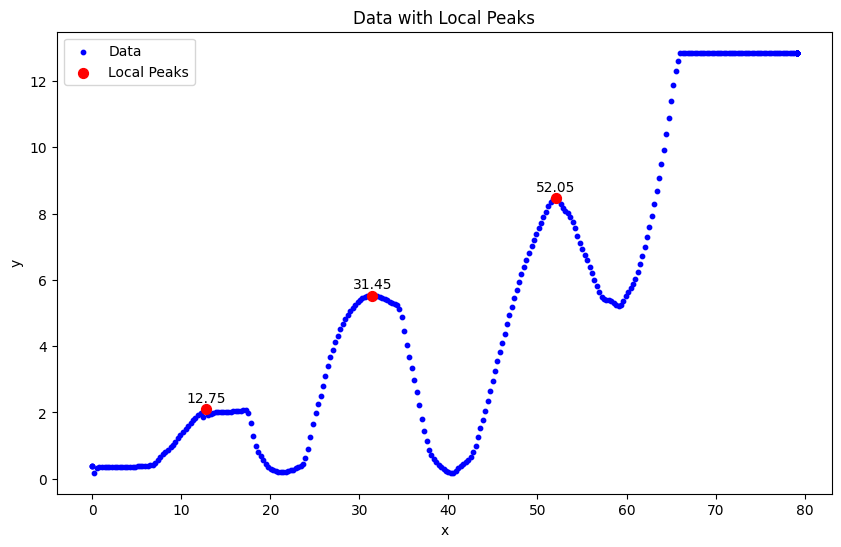

In [3]:
# Find local peaks in the y data
peaks, _ = find_peaks(y,distance=30)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data', color='blue', s=10)
plt.scatter(x[peaks], y[peaks], color='red', label='Local Peaks', s=50)  # Marking peaks

# Annotate each peak with its x-coordinate
for peak in peaks:
    plt.annotate(f"{x[peak]:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
# plt.ylim(0,1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with Local Peaks')
plt.legend()
plt.show()

In [4]:
# Load the data from the Excel file
file_path = 'coba_olah.xlsx'  # Replace with your file path
excel_data = pd.ExcelFile(file_path)  # Load the Excel file with multiple sheets

In [5]:
# function to remove value x in list "data"
def remove_value(data, x):
    return [value for value in data if value != x]

# function to find average of flat peak
def avg_peak(x, y, peak):
    flat_peak = [x[peak]]
    
    #check backward
    i=1
    while(y[peak-i] == y[peak]):
        flat_peak.append(x[peak-i])
        i+=1
    
    #check forward
    i=1
    while(y[peak+i] == y[peak]):
        flat_peak.append(x[peak+i])
        i+=1
    
    return sum(flat_peak)/len(flat_peak)

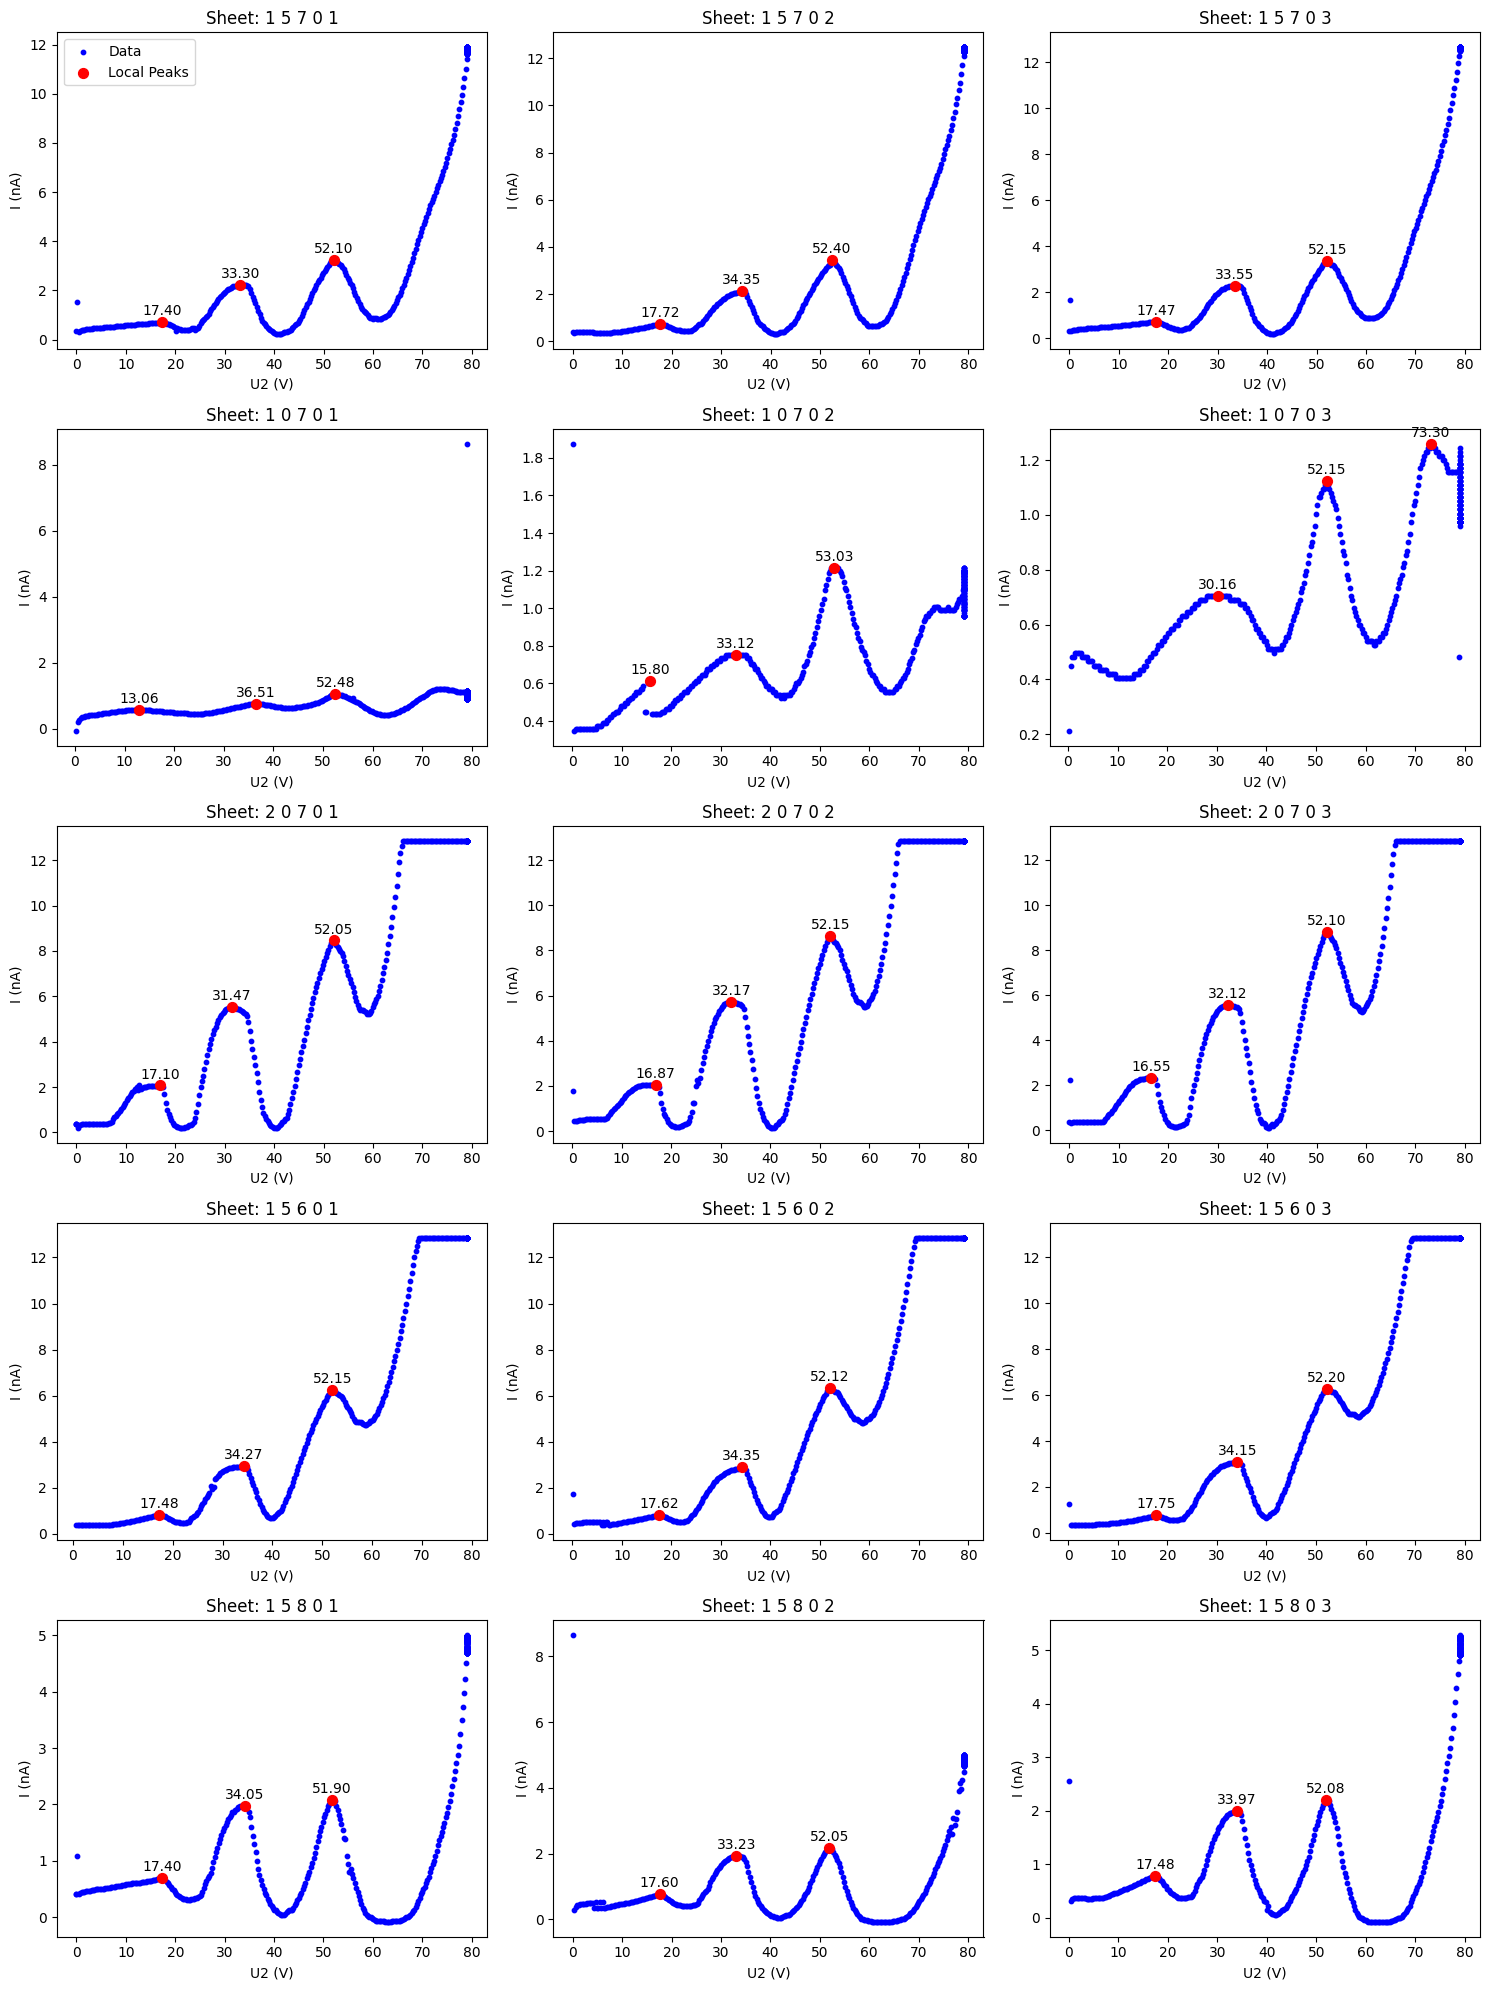

In [6]:
# gambaran semuanya

# Set up a figure with subplots
num_sheets = len(excel_data.sheet_names)  # Adjusts based on the actual number of sheets
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Creates a 5x3 grid for 15 sheets
axes = axes.flatten()  # Flatten for easier iteration
n=0

# Loop through each sheet
for i, sheet_name in enumerate(excel_data.sheet_names[:15]):  # Limit to 15 sheets
    n+=1 # grafik k berapa

    # Load data from the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Assuming 'x' and 'y' columns in each sheet
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Find local peaks in the y data
    peaks0, _ = find_peaks(y, distance=30)
    if(n==7): # fine tune graph ke4
        y_dummy = y.copy()
        y_dummy[:52] = [0 for i in range(52)]
        peaks0, _ = find_peaks(y_dummy, distance=30)

    # remove x lower than 10V, higher than 70V
    peaks1 = np.array(peaks0)
    threshold_x= 255
    peaks = peaks1[(peaks1 <= 274) & (peaks1 >=25)]
    if(n==4):
        peaks = peaks1[(peaks1 <= 255) & (peaks1 >=25)]
    # print(peaks)

    peaks2 = peaks.copy()
    ref = y[peaks[0]]
    for j in peaks:
        if(y[j]<ref):
            peaks2 = remove_value(peaks,j)
        
        else:
            ref= y[j]
    peaks = peaks2

    # Scatter plot for the current sheet in its subplot
    axes[i].scatter(x, y, color='blue', s=10, label='Data')
    axes[i].scatter(x[peaks], y[peaks], color='red', s=50, label='Local Peaks')
    
    # Annotate each peak with its x-coordinate
    for peak in peaks:
        x_peak_avg = avg_peak(x, y, peak)
        axes[i].annotate(f"{x_peak_avg:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Set titles and labels for each subplot
    axes[i].set_title(f'Sheet: {sheet_name}')
    axes[i].set_xlabel('U2 (V)')
    axes[i].set_ylabel('I (nA)')

# Hide any unused subplots if there are less than 15 sheets
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and show the legend only once
plt.tight_layout()
axes[0].legend(loc='upper left')  # Show legend in the first subplot only
plt.show()